# Wind from Saildrone Anemometer

In [9]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
from glob import glob
%matplotlib inline

In [6]:
dfEnv1022 = pd.read_csv('../../data/Env/processed/Env1022.csv')
dfEnv1023 = pd.read_csv('../../data/Env/processed/Env1023.csv')
dfEnv1022.dtime = pd.to_datetime(dfEnv1022.dtime)
dfEnv1022 = dfEnv1022.set_index('dtime')
dfEnv1022 = dfEnv1022.sort_index()
dfEnv1022 = dfEnv1022[np.isfinite(dfEnv1022['uWind'])]
dfEnv1023.dtime = pd.to_datetime(dfEnv1023.dtime)
dfEnv1023 = dfEnv1023.set_index('dtime')
dfEnv1023 = dfEnv1023.sort_index()
dfEnv1023 = dfEnv1023[np.isfinite(dfEnv1023['uWind'])]
dfMLS1 = dfEnv1023[(dfEnv1023.index > '2018-07-20 20:00:00') & (dfEnv1023.index < '2018-08-04 00:00:00')]
dfMLS1 = dfMLS1.sort_index()
dfMLS1.name = 'MLS-1'
dfMLS2 = dfEnv1022[(dfEnv1022.index > '2018-07-23 20:00:00') & (dfEnv1022.index < '2018-08-13 00:00:00')]
dfMLS2 = dfMLS2.sort_index()
dfMLS2.name = 'MLS-2'
dfMLS3 = pd.concat([dfEnv1023[(dfEnv1023.index > '2018-08-13 15:00:00') & (dfEnv1023.index < '2018-08-16 20:00:00')], dfEnv1022[(dfEnv1022.index > '2018-08-22 00:00:00') & (dfEnv1022.index < '2018-08-29 00:00:00')]])
dfMLS3 = dfMLS3.sort_index()
dfMLS3.name = 'MLS-3'
dfMLS4 = dfEnv1023[(dfEnv1023.index > '2018-08-30 20:00:00') & (dfEnv1023.index < '2018-09-11 17:00:00')]
dfMLS4 = dfMLS4.sort_index()
dfMLS4.name = 'MLS-4'

dfMLS1['uCum'] = dfMLS1.uWind.cumsum()
dfMLS1['vCum'] = dfMLS1.vWind.cumsum()
dfMLS2['uCum'] = dfMLS2.uWind.cumsum()
dfMLS2['vCum'] = dfMLS2.vWind.cumsum()
dfMLS3['uCum'] = dfMLS3.uWind.cumsum()
dfMLS3['vCum'] = dfMLS3.vWind.cumsum()
dfMLS4['uCum'] = dfMLS4.uWind.cumsum()
dfMLS4['vCum'] = dfMLS4.vWind.cumsum()

# Compare with winds from NCEP

I directly pulled the NCEP winds from the website

In [2]:
uWind = xr.open_dataset('../../data/NCEP/uwnd.sig995.2018.nc')
vWind = xr.open_dataset('../../data/NCEP/vwnd.sig995.2018.nc')

In [3]:
# Let's take a look at the metadata
uWind.uwnd

<xarray.DataArray 'uwnd' (time: 1460, lat: 73, lon: 144)>
[15347520 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 2018-01-01 ... 2018-12-31T18:00:00
Attributes:
    long_name:     4xDaily u-wind at sigma level 995
    units:         m/s
    precision:     2
    GRIB_id:       33
    GRIB_name:     UGRD
    var_desc:      u-wind
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    valid_range:   [-102.2  102.2]
    dataset:       NCEP Reanalysis
    actual_range:  [-38.1       35.000004]

### Compare Saildrone and NCEP - Supplementary Figure

I'm selecting the NCEP surface wind value from 70N and 165W, which is about the center of mass of our mini surveys. First I'll just plot the time series on top of each other:

C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


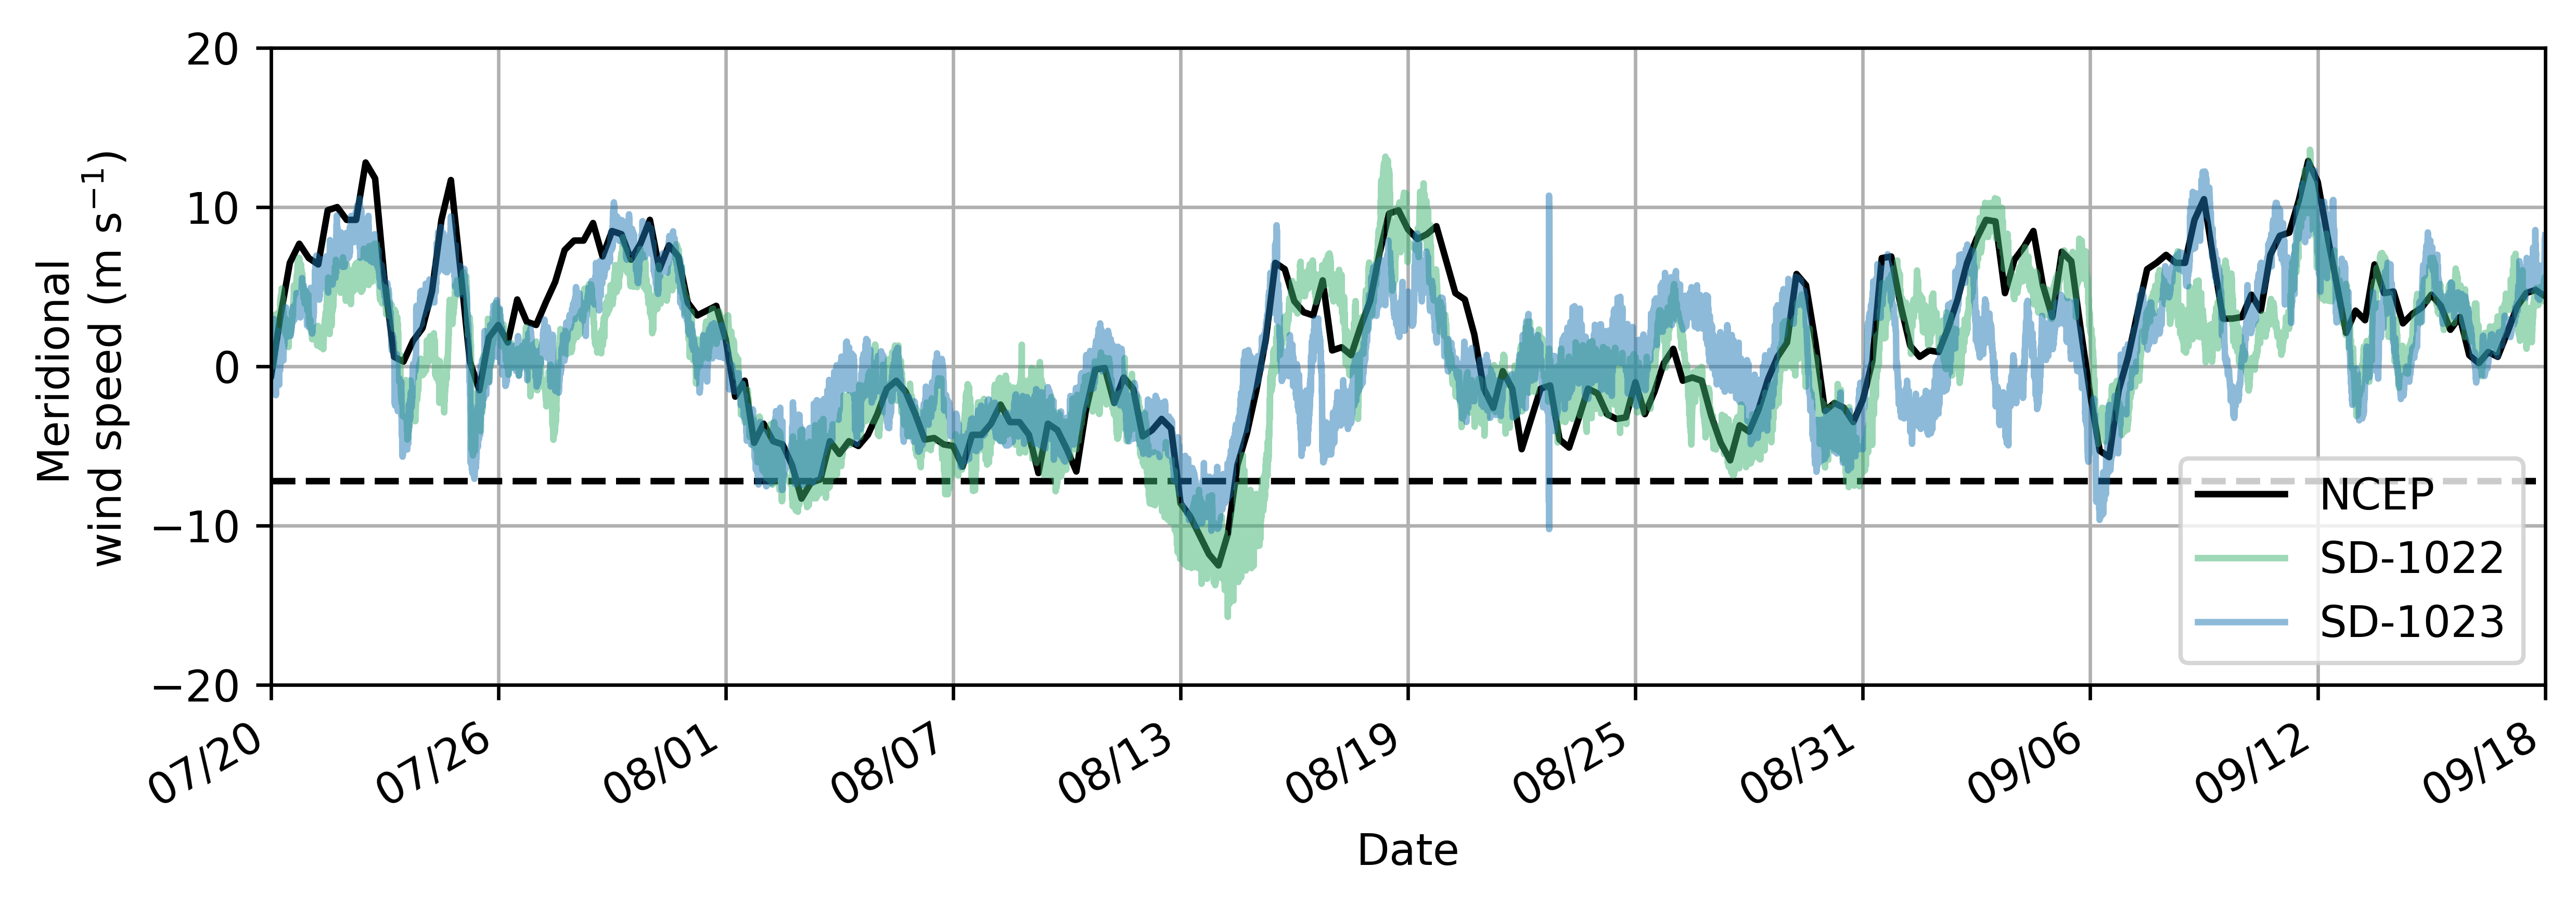

In [8]:
import datetime
import matplotlib.dates as mdates
fig = plt.figure(figsize=(9.4,3),dpi=600)
vWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].vwnd.sel(lat = 70).sel(lon=195).plot(color='k')
dfEnv1022.loc[(dfEnv1022.index >= '2018-07-15') & (dfEnv1022.index <= '2018-09-21')].vWind.plot(color = 'mediumseagreen',alpha=0.5)
dfEnv1023.loc[(dfEnv1023.index >= '2018-07-15') & (dfEnv1023.index <= '2018-09-21')].vWind.plot(alpha=0.5)
plt.grid(which='major')
plt.axis([pd.to_datetime('2018-07-20'), pd.to_datetime('2018-09-18'),-20, 20])
plt.ylabel('Meridional\n wind speed (m s$^{-1}$)')
plt.title('')
plt.xlabel('Date')
plt.hlines(-7.2,pd.to_datetime('2018-07-20'), pd.to_datetime('2018-09-18'),linestyles='dashed')
ax1 = plt.axes()
ax1.xaxis.set_ticks(np.append(np.arange(pd.to_datetime('2018-07-20'), pd.to_datetime('2018-09-18'), datetime.timedelta(days=6)),pd.to_datetime('2018-09-18')))
fig.autofmt_xdate()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.legend(['NCEP','SD-1022','SD-1023'])

## Just a few more plots to look at how the wind matches up

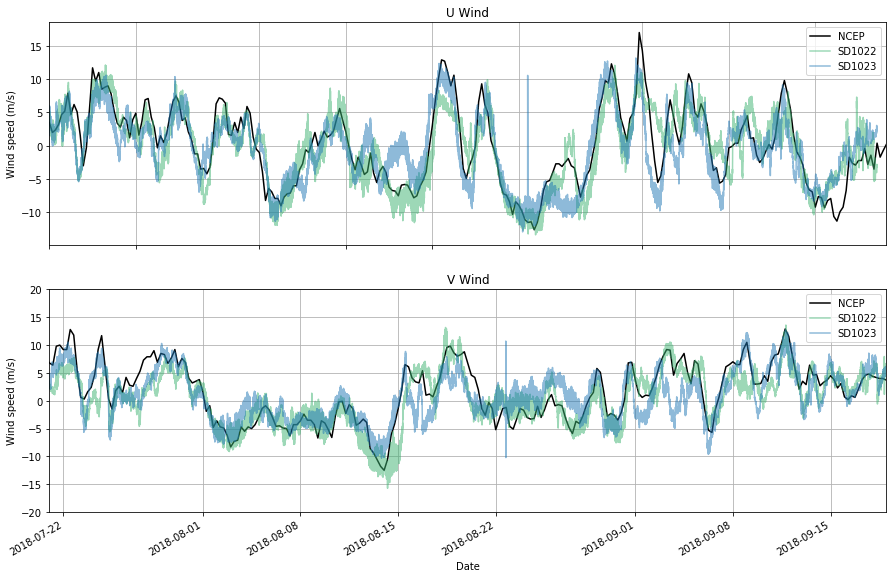

In [19]:
figure= plt.figure(figsize=(15,10))
plt.subplot(211)
uWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].uwnd.sel(lat = 70).sel(lon=195).plot(color='k')
dfEnv1022.loc[(dfEnv1022.index >= '2018-07-15') & (dfEnv1022.index <= '2018-09-20')].uWind.plot(color = 'mediumseagreen',alpha=0.5)
dfEnv1023.loc[(dfEnv1023.index >= '2018-07-15') & (dfEnv1023.index <= '2018-09-20')].uWind.plot(alpha=0.5)
#dfEnv1022.loc[(dfEnv1022.index >= '2018-07-15') & (dfEnv1022.index <= '2018-09-21')].resample('6H').mean().uWind.plot(color = 'mediumseagreen',alpha=0.9)
#dfEnv1023.loc[(dfEnv1023.index >= '2018-07-15') & (dfEnv1023.index <= '2018-09-21')].resample('6H').mean().uWind.plot(alpha=0.9)
plt.legend(['NCEP','SD1022','SD1023'])
plt.xlabel('')
plt.tick_params(labelbottom=False) 
plt.title('U Wind')
plt.ylabel('Wind speed (m/s)')
plt.grid()
plt.subplot(212)
vWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].vwnd.sel(lat = 70).sel(lon=195).plot(color='k')
dfEnv1022.loc[(dfEnv1022.index >= '2018-07-15') & (dfEnv1022.index <= '2018-09-21')].vWind.plot(color = 'mediumseagreen',alpha=0.5)
dfEnv1023.loc[(dfEnv1023.index >= '2018-07-15') & (dfEnv1023.index <= '2018-09-21')].vWind.plot(alpha=0.5)
#dfEnv1022.loc[(dfEnv1022.index >= '2018-07-15') & (dfEnv1022.index <= '2018-09-21')].resample('6H').mean().vWind.plot(color = 'mediumseagreen',alpha=0.9)
#dfEnv1023.loc[(dfEnv1023.index >= '2018-07-15') & (dfEnv1023.index <= '2018-09-21')].resample('6H').mean().vWind.plot(alpha=0.9)
plt.grid()
plt.axis([pd.to_datetime('2018-07-21'), pd.to_datetime('2018-09-19'),-20, 20])
plt.title('V Wind')
plt.ylabel('Wind speed (m/s)')
plt.xlabel('Date')
plt.legend(['NCEP','SD1022','SD1023'])

I'm going to resample down my saildrone data to 6 hour chunks to match the 6 hour intervals of the NCEP dataset, then I can do 1:1 plots of every time point.

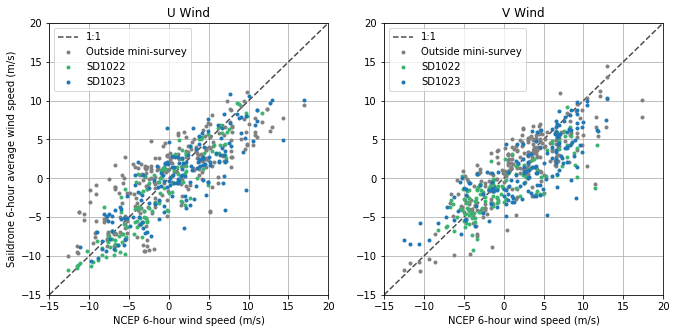

In [10]:
dfEnv10226Hr = dfEnv1022.loc[(dfEnv1022.index >= '2018-07-15') & (dfEnv1022.index < '2018-09-21')].resample('6H').mean()
dfEnv10236Hr = dfEnv1023.loc[(dfEnv1023.index >= '2018-07-15') & (dfEnv1023.index < '2018-09-21')].resample('6H').mean()

insideMini1022 = (dfEnv10226Hr.lat >= 69.25) & (dfEnv10226Hr.lat <= 71.25)
insideMini1023 = (dfEnv10236Hr.lat >= 69.25) & (dfEnv10236Hr.lat <= 71.25)
figure = plt.figure(figsize=(11,5))
plt.subplot(121)
plt.plot([-15,20],[-15,20],'--k',alpha=.7)
plt.plot(uWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].uwnd.sel(lat = 70).sel(lon=195).values[~insideMini1022],dfEnv10226Hr.uWind.values[~insideMini1022],'.',color = 'gray', label = '_nolegend_')
plt.plot(uWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].uwnd.sel(lat = 70).sel(lon=195).values[~insideMini1023],dfEnv10236Hr.uWind.values[~insideMini1023],'.',color = 'gray')
plt.plot(uWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].uwnd.sel(lat = 70).sel(lon=195).values[insideMini1022],dfEnv10226Hr.uWind.values[insideMini1022],'.',color = 'mediumseagreen')
plt.plot(uWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].uwnd.sel(lat = 70).sel(lon=195).values[insideMini1023],dfEnv10236Hr.uWind.values[insideMini1023],'.')
plt.legend(['1:1','Outside mini-survey','SD1022','SD1023'])
plt.title('U Wind')
plt.xlabel('NCEP 6-hour wind speed (m/s)')
plt.ylabel('Saildrone 6-hour average wind speed (m/s)')
plt.grid()
plt.xlim([-15,20])
plt.ylim([-15,20])

plt.subplot(122)
plt.plot([-15,20],[-15,20],'--k',alpha=.7)
plt.plot(vWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].vwnd.sel(lat = 70).sel(lon=195).values[~insideMini1022],dfEnv10226Hr.vWind.values[~insideMini1022],'.',color = 'gray', label = '_nolegend_')
plt.plot(vWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].vwnd.sel(lat = 70).sel(lon=195).values[~insideMini1023],dfEnv10236Hr.vWind.values[~insideMini1023],'.',color = 'gray')
plt.plot(vWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].vwnd.sel(lat = 70).sel(lon=195).values[insideMini1022],dfEnv10226Hr.vWind.values[insideMini1022],'.',color = 'mediumseagreen')
plt.plot(vWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].vwnd.sel(lat = 70).sel(lon=195).values[insideMini1023],dfEnv10236Hr.vWind.values[insideMini1023],'.')
plt.legend(['1:1','Outside mini-survey','SD1022','SD1023'])
plt.title('V Wind')
plt.xlabel('NCEP 6-hour wind speed (m/s)')
plt.grid()
#plt.ylabel('Saildrone 6-hour average wind speed (m/s)')
plt.xlim([-15,20])
plt.ylim([-15,20]);

## Multiyear comparison

Is there anything worth pointing out from 2012/13?

In [16]:
vWind

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 7304)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * time     (time) datetime64[ns] 2012-01-01 ... 2019-12-31T18:00:00
Data variables:
    uwnd     (time, lat, lon) float32 dask.array<chunksize=(1464, 73, 144), meta=np.ndarray>
Attributes:
    Conventions:    COARDS
    title:          4x daily NMC reanalysis (2012)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  These...
    platform:       Model
    history:        created 2011/12 by Hoop (netCDF2.3)\nConverted to chunked...
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

(737260.0, 737320.0, -20.0, 20.0)

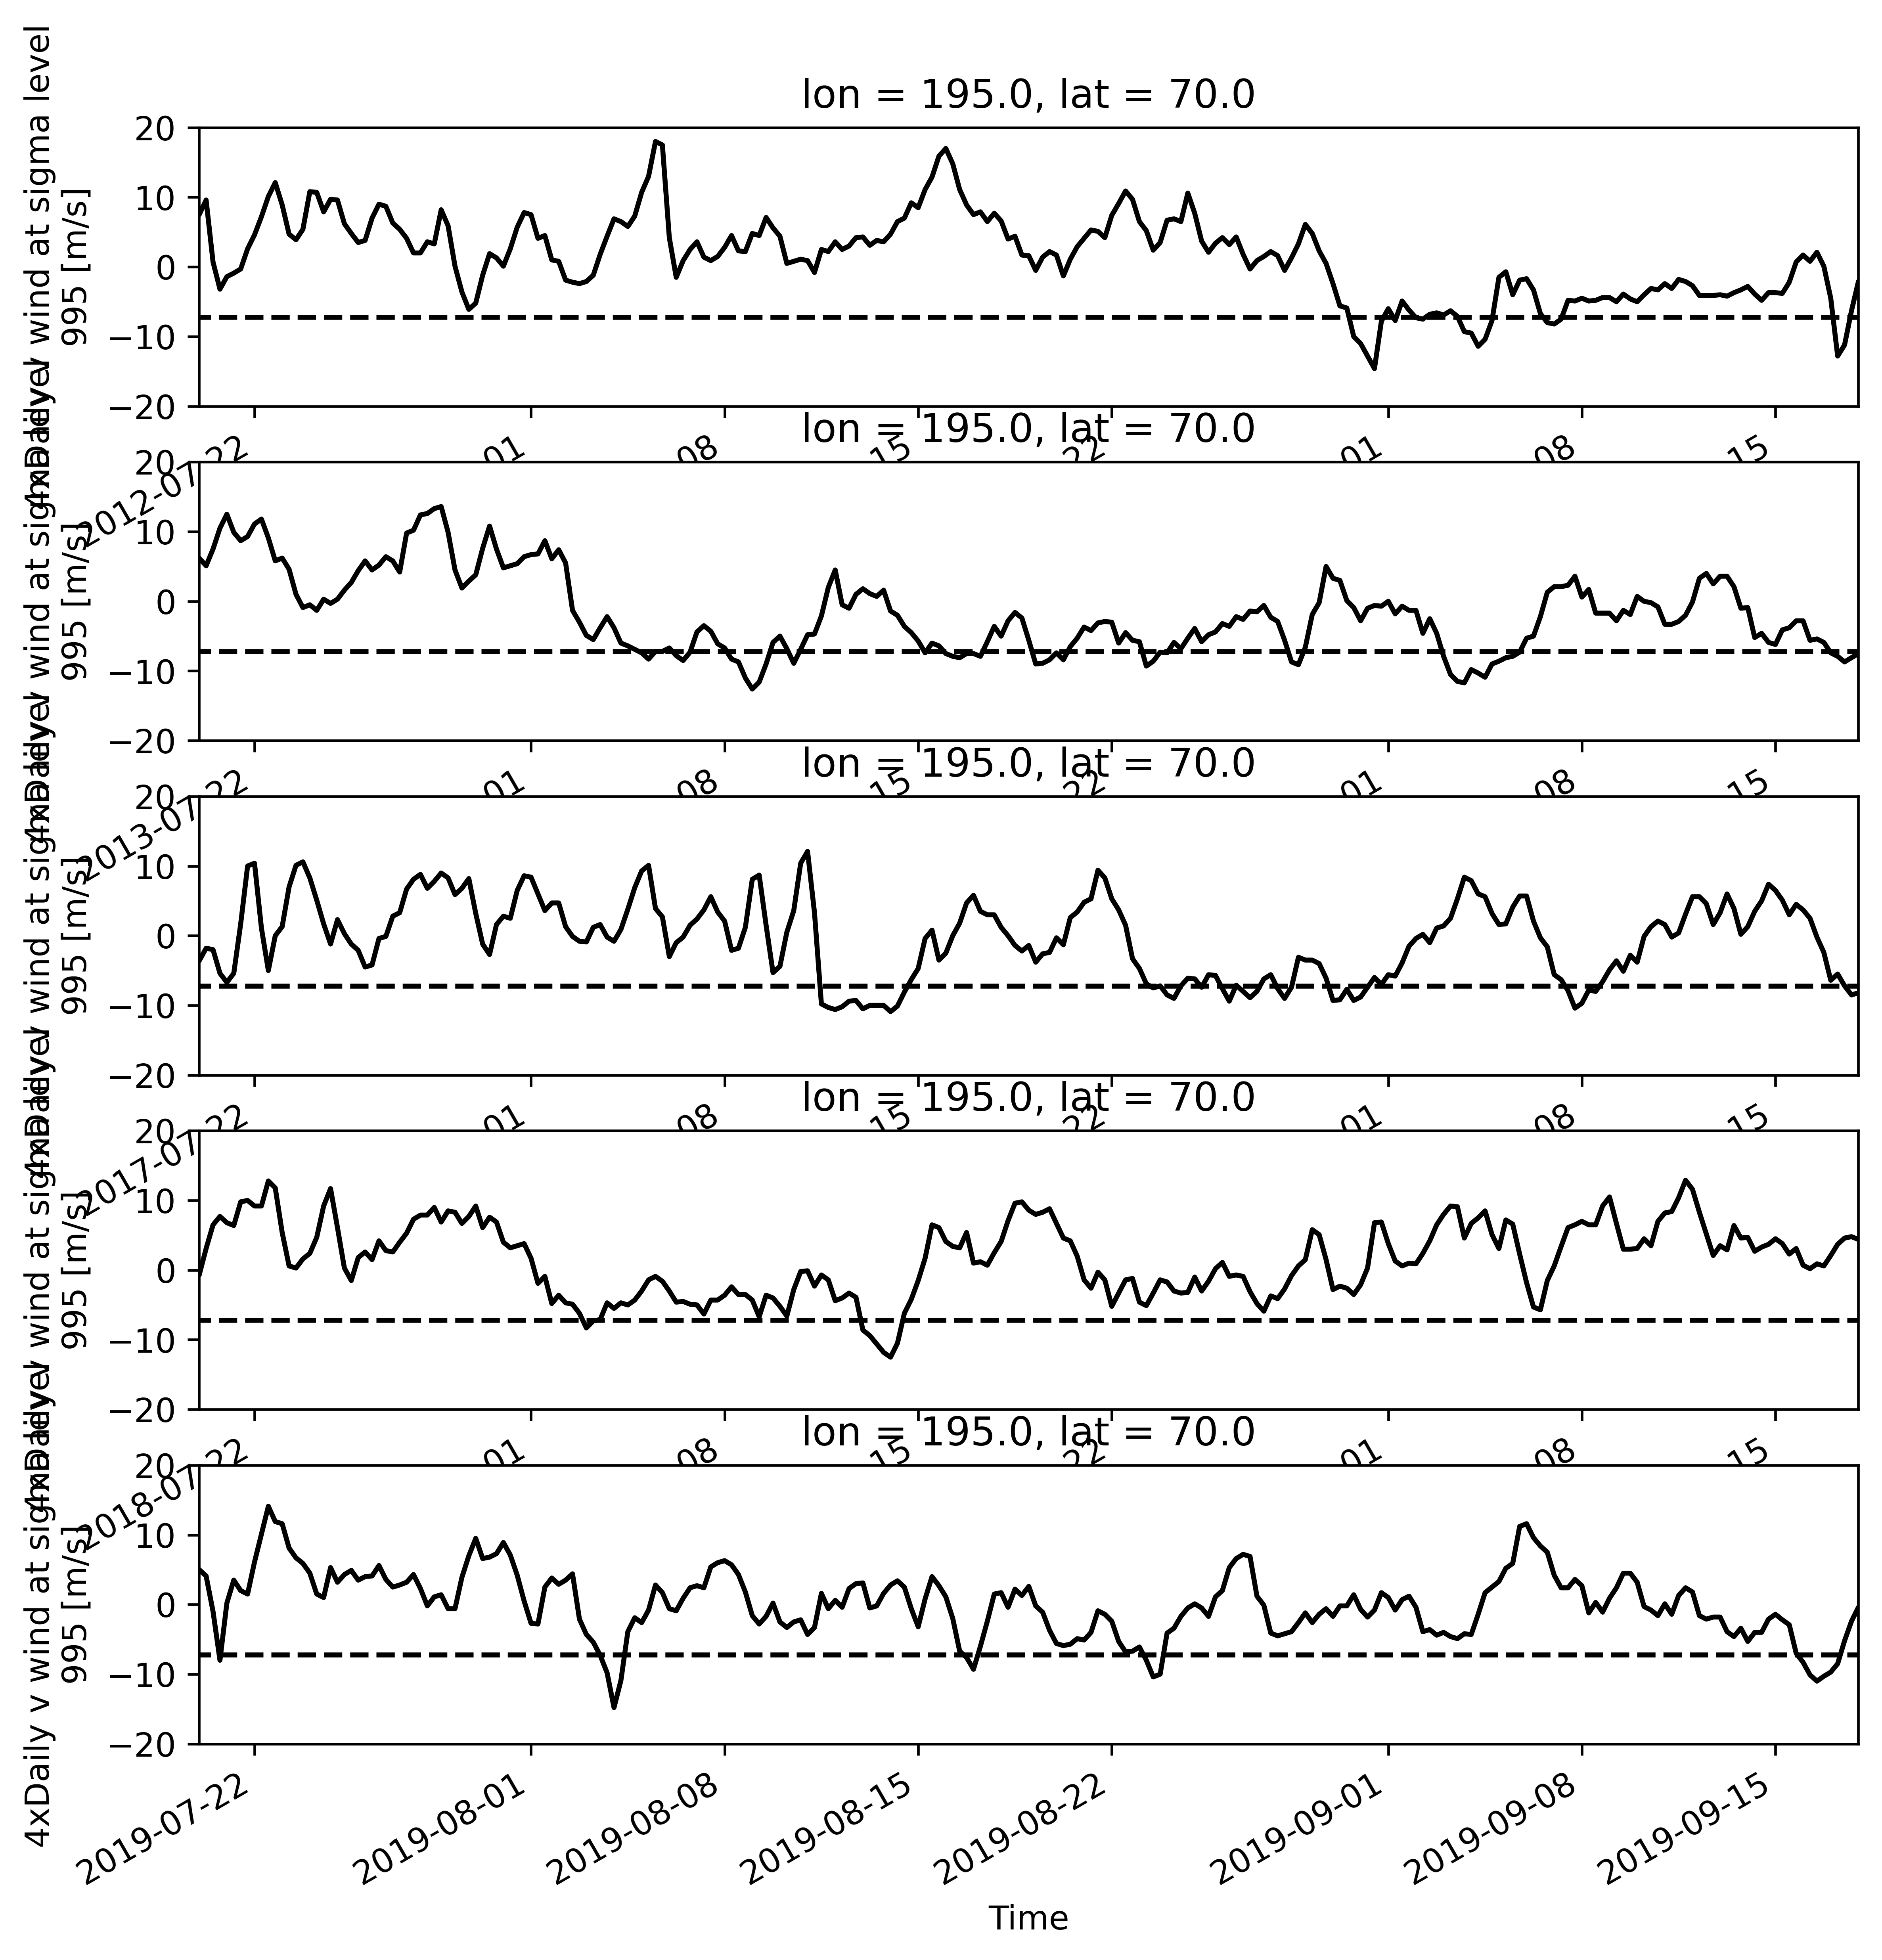

In [26]:
uWind = xr.open_mfdataset(glob('../../data/NCEP/uwnd*'),combine='by_coords')
vWind = xr.open_mfdataset(glob('../../data/NCEP/vwnd*'),combine='by_coords')
fig = plt.figure(figsize=(9,9),dpi=600)

ax1 = plt.subplot(511)
vWind.loc[dict(time=slice('2012-07-15', '2012-09-20'))].vwnd.sel(lat = 70).sel(lon=195).plot(color='k',ax=ax1)
ax1.hlines(-7.2,pd.to_datetime('2012-07-15'), pd.to_datetime('2012-09-20'),linestyles='dashed')
ax1.axis([pd.to_datetime('2012-07-20'), pd.to_datetime('2012-09-18'),-20, 20])

ax1 = plt.subplot(512)
vWind.loc[dict(time=slice('2013-07-15', '2013-09-20'))].vwnd.sel(lat = 70).sel(lon=195).plot(color='k',ax=ax1)
ax1.hlines(-7.2,pd.to_datetime('2013-07-15'), pd.to_datetime('2013-09-20'),linestyles='dashed')
ax1.axis([pd.to_datetime('2013-07-20'), pd.to_datetime('2013-09-18'),-20, 20])

ax1 = plt.subplot(513)
vWind.loc[dict(time=slice('2017-07-15', '2017-09-20'))].vwnd.sel(lat = 70).sel(lon=195).plot(color='k',ax=ax1)
ax1.hlines(-7.2,pd.to_datetime('2017-07-15'), pd.to_datetime('2017-09-20'),linestyles='dashed')
ax1.axis([pd.to_datetime('2017-07-20'), pd.to_datetime('2017-09-18'),-20, 20])

ax1 = plt.subplot(514)
vWind.loc[dict(time=slice('2018-07-15', '2018-09-20'))].vwnd.sel(lat = 70).sel(lon=195).plot(color='k',ax=ax1)
ax1.hlines(-7.2,pd.to_datetime('2018-07-15'), pd.to_datetime('2018-09-20'),linestyles='dashed')
ax1.axis([pd.to_datetime('2018-07-20'), pd.to_datetime('2018-09-18'),-20, 20])

ax1 = plt.subplot(515)
vWind.loc[dict(time=slice('2019-07-15', '2019-09-20'))].vwnd.sel(lat = 70).sel(lon=195).plot(color='k',ax=ax1)
ax1.hlines(-7.2,pd.to_datetime('2019-07-15'), pd.to_datetime('2019-09-20'),linestyles='dashed')
ax1.axis([pd.to_datetime('2019-07-20'), pd.to_datetime('2019-09-18'),-20, 20])

At first glance it doesn't look like 2018 is any type of special. It also looks like that there's little pattern in association with the catches we've had, looking at the number of days of southerly wind during JAS:

In [58]:
print('2012: ',len(np.where(vWind.loc[dict(time=slice('2012-07-01', '2012-09-30'))].vwnd.sel(lat = 70).sel(lon=195).values <-7.2)[0])/len(vWind.loc[dict(time=slice('2012-07-01', '2012-09-30'))].vwnd.sel(lat = 70).sel(lon=195).values))
print('2013: ',len(np.where(vWind.loc[dict(time=slice('2013-07-01', '2013-09-30'))].vwnd.sel(lat = 70).sel(lon=195).values <-7.2)[0])/len(vWind.loc[dict(time=slice('2013-07-01', '2013-09-30'))].vwnd.sel(lat = 70).sel(lon=195).values))
print('2017: ',len(np.where(vWind.loc[dict(time=slice('2017-07-01', '2017-09-30'))].vwnd.sel(lat = 70).sel(lon=195).values <-7.2)[0])/len(vWind.loc[dict(time=slice('2017-07-01', '2017-09-30'))].vwnd.sel(lat = 70).sel(lon=195).values))
print('2018: ',len(np.where(vWind.loc[dict(time=slice('2018-07-01', '2018-09-30'))].vwnd.sel(lat = 70).sel(lon=195).values <-7.2)[0])/len(vWind.loc[dict(time=slice('2018-07-01', '2018-09-30'))].vwnd.sel(lat = 70).sel(lon=195).values))
print('2019: ',len(np.where(vWind.loc[dict(time=slice('2019-07-01', '2019-09-30'))].vwnd.sel(lat = 70).sel(lon=195).values <-7.2)[0])/len(vWind.loc[dict(time=slice('2019-07-01', '2019-09-30'))].vwnd.sel(lat = 70).sel(lon=195).values))



2012:  0.09782608695652174
2013:  0.17119565217391305
2017:  0.11684782608695653
2018:  0.029891304347826088
2019:  0.043478260869565216
